In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install pyyaml==5.4.1
!pip install pycaret[full]

     |████████████████████████████████| 636 kB 9.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 288 kB 7.7 MB/s 
     |████████████████████████████████| 1.3 MB 100.2 MB/s 
     |████████████████████████████████| 261 kB 92.3 MB/s 
     |████████████████████████████████| 15.5 MB 82.8 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 113 kB 95.9 MB/s 
     |████████████████████████████████| 167 kB 76.3 MB/s 
     |████████████████████████████████| 6.8 MB 84.6 MB/s 
     |████████████████████████████████| 86 kB 7.1 MB/s 
     |████████████████████████████████| 2.0 MB 79.2 MB/s 
     |████████████████████████████████| 1.7 MB 62.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata

In [ ]:
# 패키지 불러오기

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
# 폴더 위치 지정 및 데이터 불러오기

folder_path = '/content/gdrive/MyDrive/0.competition/dataset/'

labeled = pd.read_csv(folder_path+'cn7_labeled_with_reason.csv', index_col=0)  #, low_memory=False
unlabeled = pd.read_csv(folder_path+'cn7_unlabeled.csv', index_col=0)

In [ ]:
# 불량 원인(Reason)별로 데이터 생성

labeled_initial = labeled[(labeled['Reason']=='초기허용불량') | (labeled['Reason']=='None')]
labeled_initial = labeled_initial.drop(columns={'Reason'})

labeled_gas = labeled[(labeled['Reason']=='가스') | (labeled['Reason']=='None')]
labeled_gas = labeled_gas.drop(columns={'Reason'})

labeled_unplastic = labeled[(labeled['Reason']=='미성형') | (labeled['Reason']=='None')]
labeled_unplastic = labeled_unplastic.drop(columns={'Reason'})

In [ ]:
# X Group(초기허용불량 데이터)의 train, test셋 생성

data_ = labeled_initial
labeled_train_data = data_.sample(frac=0.8, random_state=2021)
labeled_test_data = data_.drop(labeled_train_data.index)

In [ ]:
# Data 설정. Robust Scaler로 데이터 정규화 및 SMOTE 통한 Oversampling 수행

data = setup(labeled_train_data, target = 'LABEL', numeric_features = ['Clamp_Open_Position'], remove_perfect_collinearity = False,
             normalize = True, normalize_method = 'robust',
             fix_imbalance = True)

,Description,Value
0,session_id,5453
1,Target,LABEL
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5374, 25)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Random Forest 생성

randfor = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# XGBoost 생성

xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# AdaBoost 생성

adb = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# LightGBM 생성

lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0000,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0000,1.0,1.0,1.0,1.0,1.0,1.0
3,0.9973,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0000,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0000,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0000,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0000,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0000,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0000,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# CatBoost 생성

catb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Random Forest 모델의 F1 score가 최소가 되도록 hyperparameter 튜닝

tuned_randfor = tune_model(randfor, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0,1.0,1.0000,1.00,1.0000,1.0000
1,0.9987,1.0,1.0,0.6667,0.80,0.7994,0.8160
2,1.0000,1.0,1.0,1.0000,1.00,1.0000,1.0000
3,1.0000,1.0,1.0,1.0000,1.00,1.0000,1.0000
4,1.0000,1.0,1.0,1.0000,1.00,1.0000,1.0000
Mean,0.9997,1.0,1.0,0.9333,0.96,0.9599,0.9632
SD,0.0005,0.0,0.0,0.1333,0.08,0.0803,0.0736


In [ ]:
# XGBoost 모델의 F1 score가 최소가 되도록 hyperparameter 튜닝

tuned_xgb = tune_model(xgb, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SD,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# AdaBoost 모델의 F1 score가 최소가 되도록 hyperparameter 튜닝


tuned_adb = tune_model(adb, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SD,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# LightGBM 모델의 F1 score가 최소가 되도록 hyperparameter 튜닝

tuned_lgbm = tune_model(lgbm, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SD,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# CatBoost 모델의 F1 score가 최소가 되도록 hyperparameter 튜닝

tuned_catb = tune_model(catb, optimize = 'F1', fold = 5, verbose = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SD,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 모델의 평가 지표를 출력하는 함수 선언

def evaluation(model):
  test_predicted = predict_model(model, labeled_test_data)
  labeled_confusion = confusion_matrix(test_predicted['LABEL'], test_predicted['Label'])
  labeled_accuracy_score = accuracy_score(test_predicted['LABEL'], test_predicted['Label'])
  labeled_precision_score = precision_score(test_predicted['LABEL'], test_predicted['Label'])
  labeled_recall_score = recall_score(test_predicted['LABEL'], test_predicted['Label'])
  labeled_f1_score = f1_score(test_predicted['LABEL'], test_predicted['Label'])
  
  print("Confusion Matrix : \n", labeled_confusion)
  print("Accuracy : ", labeled_accuracy_score)
  print("Precision : ", labeled_precision_score)
  print("Recall : ", labeled_recall_score)
  print("F1-score : ", labeled_f1_score)

  return

In [ ]:
# Random Forest 평가

evaluation(tuned_randfor)

Confusion Matrix : 
 [[1339    0]
 [   0    4]]
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-score :  1.0


In [ ]:
# XGBoost 평가

evaluation(tuned_xgb)

Confusion Matrix : 
 [[1339    0]
 [   0    4]]
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-score :  1.0


In [ ]:
# AdaBoost 평가

evaluation(tuned_adb)

Confusion Matrix : 
 [[1339    0]
 [   0    4]]
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-score :  1.0


In [ ]:
# LightGBM 평가

evaluation(tuned_lgbm)

Confusion Matrix : 
 [[1339    0]
 [   0    4]]
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-score :  1.0


In [ ]:
# CatBoost 평가

evaluation(tuned_catb)

Confusion Matrix : 
 [[1339    0]
 [   0    4]]
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-score :  1.0


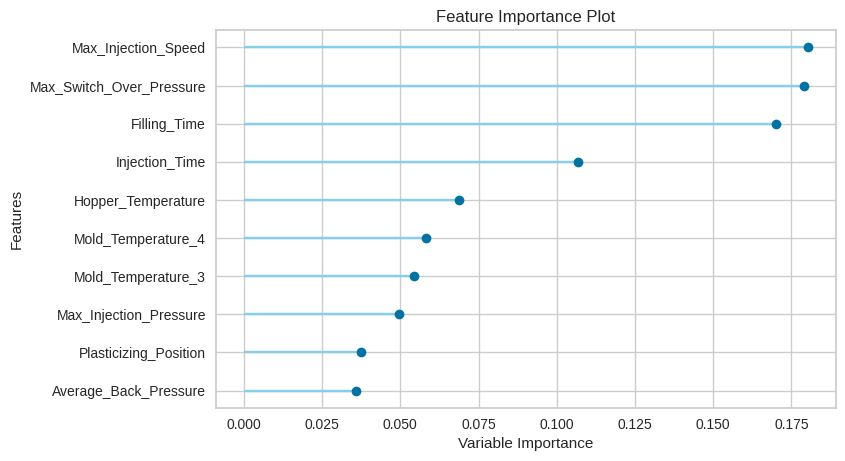

In [ ]:
# Random Forest 모델의 변수 중요도 출력

plot_model(tuned_randfor, plot = 'feature')

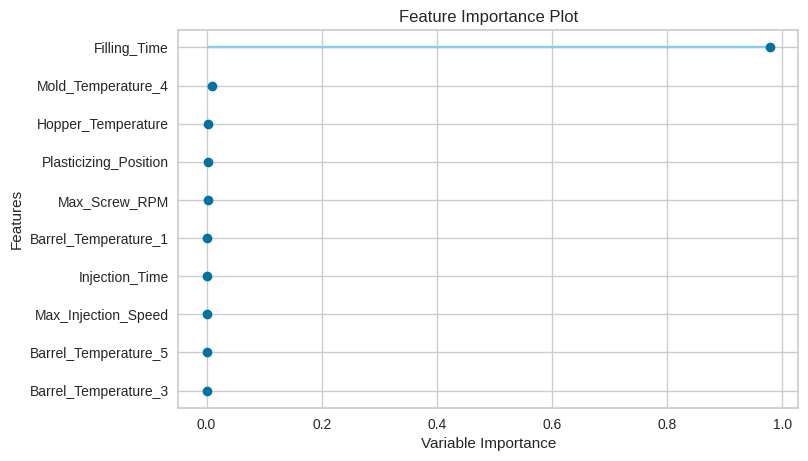

In [ ]:
# XGBoost 모델의 변수 중요도 출력

plot_model(tuned_xgb, plot = 'feature')

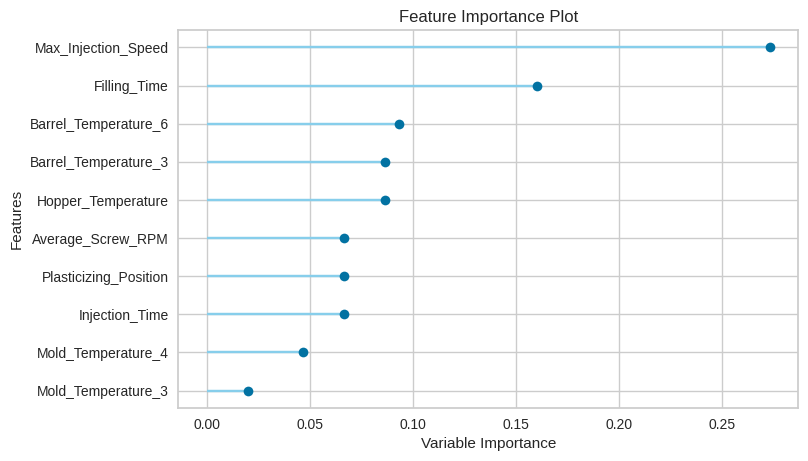

In [ ]:
# AdaBoost 모델의 변수 중요도 출력

plot_model(tuned_adb, plot = 'feature')

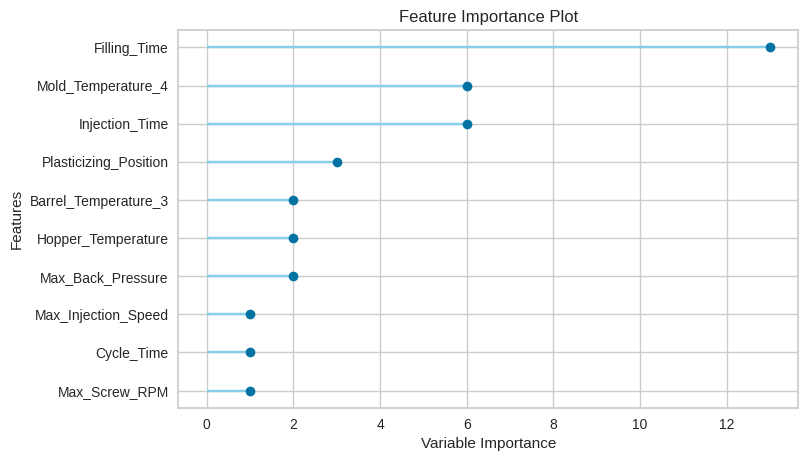

In [ ]:
# LightGBM 모델의 변수 중요도 출력

plot_model(tuned_lgbm, plot = 'feature')

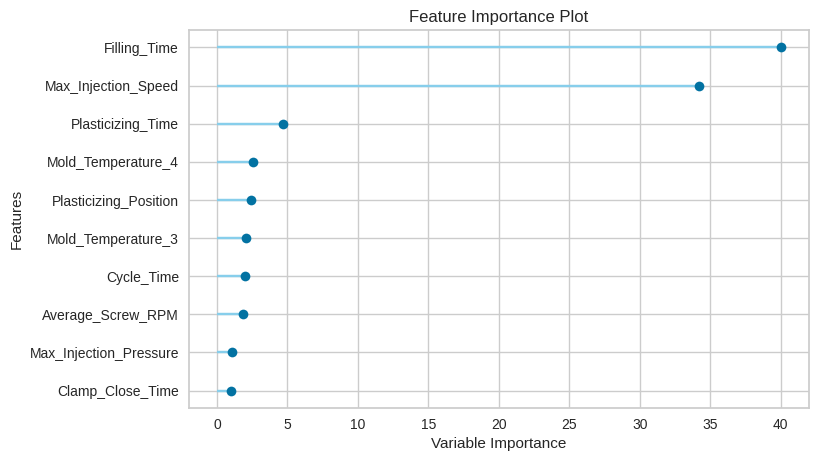

In [ ]:
# CatBoost 모델의 변수 중요도 출력

plot_model(tuned_catb, plot = 'feature')

In [ ]:
# Unlabeled Data의 불량 여부를 각 모델을 통해 예측

unlabeled_randfor = predict_model(tuned_randfor, unlabeled)
unlabeled_tuned_xgb = predict_model(tuned_xgb, unlabeled)
unlabeled_tuned_adb = predict_model(tuned_adb, unlabeled)
unlabeled_tuned_lgbm = predict_model(tuned_lgbm, unlabeled)
unlabeled_tuned_catb = predict_model(tuned_catb, unlabeled)

print(unlabeled_randfor.Label.value_counts())
print(unlabeled_tuned_xgb.Label.value_counts())
print(unlabeled_tuned_adb.Label.value_counts())
print(unlabeled_tuned_lgbm.Label.value_counts())
print(unlabeled_tuned_catb.Label.value_counts())

0    82861
1      109
Name: Label, dtype: int64
0    43949
1    39021
Name: Label, dtype: int64
0    82855
1      115
Name: Label, dtype: int64
0    43872
1    39098
Name: Label, dtype: int64
0    44144
1    38826
Name: Label, dtype: int64
